<a href="https://colab.research.google.com/github/BelaSapira16/LogisticRegression/blob/master/Sentiment_Analysis_Dengan_LSTM_G1A017020_%26_G1A017033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anisajelita","key":"3b52970356ff5e3d2f006b78686f7e0b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

In [ ]:
#intall dataset
!kaggle datasets download -d tuxboy/restaurant-reviews-in-dhaka-bangladesh

  0% 0.00/875k [00:00<?, ?B/s]
100% 875k/875k [00:00<00:00, 60.4MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "restaurant-reviews-in-dhaka-bangladesh.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Selesai di ekstak')

Selesai di ekstak


In [ ]:
import pandas as pd
data1 = pd.read_csv('reviews.csv')
data1.head()

,Review Text,Review,Recommends
0,"Friendly staff, good food and homely environme...",NaN,True
1,Well...The Food was Good___Intrerior design is...,NaN,True
2,The man who is foodie like me for him arabian ...,5.0,NaN
3,ordered pizza and they were unable to serve th...,NaN,False
4,This place is too much comfortable & food is d...,4.0,NaN


In [ ]:
data1=data1[data1.Review != 3]

pd.set_option('mode.chained_assignment', None)
data1["labels"] = data1["Review"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data1 = data1.drop("Review",axis=1)

data1.head()

,Review Text,Recommends,labels
0,"Friendly staff, good food and homely environme...",True,0
1,Well...The Food was Good___Intrerior design is...,True,0
2,The man who is foodie like me for him arabian ...,NaN,0
3,ordered pizza and they were unable to serve th...,False,0
4,This place is too much comfortable & food is d...,NaN,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Positive reviews are 0 and negative reviews are 1 of total 15618 


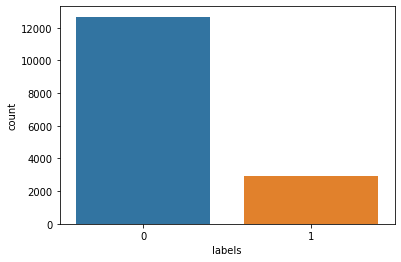

In [ ]:
negative = len(data1[data1['labels']=='0'])
positive = len(data1) - 1
sns.countplot(data1['labels'])
print('Positive reviews are {} and negative reviews are {} of total {} '.format(0,1,len(data1)))

In [ ]:
le = LabelEncoder()
training_reviews,testing_reviews,training_labels,testing_labels  = train_test_split(data1['Review Text'].values,data1['labels'].values,test_size = 0.2)
training_labels = le.fit_transform(training_labels)
testing_labels = le.fit_transform(testing_labels)

In [ ]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(training_reviews)
testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 19429


In [ ]:
embedded_words = {}
with open('reviews.csv') as file:
    for line in file:
        words, coeff = line.split(maxsplit=1)
        coeff = np.array(coeff.split(),dtype = float)
        embedded_words[words] = coeff

ValueError: ignored

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1,200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(256,activation = 'relu',),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          3886000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model.fit(train_pad_sequence,training_labels,epochs = 30 ,validation_data=(test_pad_sequence,testing_labels))

Epoch 1/30
391/391 [==============================] - 93s 227ms/step - loss: 0.6663 - accuracy: 0.8131 - val_loss: 0.6011 - val_accuracy: 0.8044
Epoch 2/30
391/391 [==============================] - 89s 227ms/step - loss: 0.5812 - accuracy: 0.8148 - val_loss: 0.5477 - val_accuracy: 0.8044
Epoch 3/30
391/391 [==============================] - 89s 227ms/step - loss: 0.5325 - accuracy: 0.8138 - val_loss: 0.5187 - val_accuracy: 0.8044
Epoch 4/30
391/391 [==============================] - 88s 226ms/step - loss: 0.5065 - accuracy: 0.8128 - val_loss: 0.5041 - val_accuracy: 0.8044
Epoch 5/30
391/391 [==============================] - 89s 226ms/step - loss: 0.4884 - accuracy: 0.8167 - val_loss: 0.4977 - val_accuracy: 0.8044
Epoch 6/30
391/391 [==============================] - 88s 226ms/step - loss: 0.4829 - accuracy: 0.8158 - val_loss: 0.4951 - val_accuracy: 0.8044
Epoch 7/30
391/391 [==============================] - 88s 226ms/step - loss: 0.4843 - accuracy: 0.8124 - val_loss: 0.4943 - val_ac

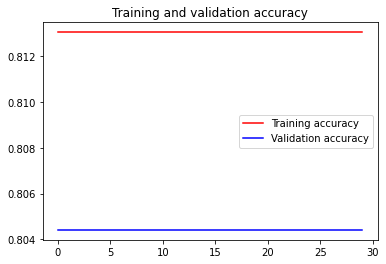

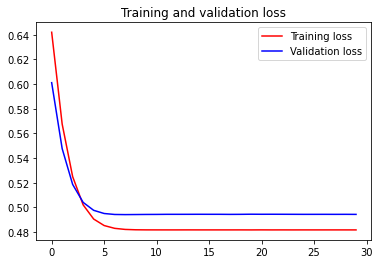

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [ ]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.8130302429199219
Validation Accuracy: 0.8044174313545227
